# Домашнее задание №4


**Задание №1**

Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.

In [2]:
import nltk

**Задание №2**

**Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл.** Проверьте, выполняется ли здесь закон Ципфа. Для этого **постройте линейную диаграмму**, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.

['chapter', 'one', 'the', 'boy', 'who', 'live', 'mr', 'and', 'mrs', 'dursley', 'of', 'number', 'four', 'privet', 'drive', 'be', 'proud', 'to', 'say', 'that', 'they', 'be', 'perfectly', 'normal', 'thank', 'you', 'very', 'much', 'they', 'be', 'the', 'last', 'people', 'you', "'d", 'expect', 'to', 'be', 'involve', 'in', 'anything', 'strange', 'or', 'mysterious', 'because', 'they', 'just', 'do', "n't", 'hold']
80122


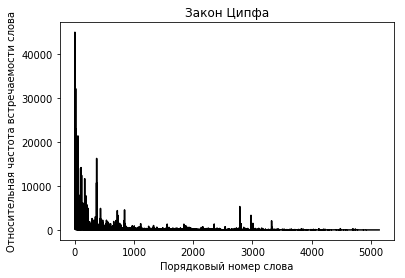

In [22]:
f = open ('Harry_Potter_and_the_Sorcerers_Stone.txt', 'r', encoding ='utf-8')
text = f.read()
punctuation= [w.strip("!?.,:;«»-") for w in text.split()] #обрезаем пунктуацию
clean_text=' '.join(punctuation)  #объединим в список через пробел
changed_text = [w.lower() if w.upper() else w for w in clean_text.split()] #приведем все к нижнему регистру
new_text = ' '.join(changed_text)
from nltk.tokenize import word_tokenize
token_text= word_tokenize(new_text) #токенизируем текст
from nltk import WordNetLemmatizer
wnl = WordNetLemmatizer() #лемматизируем текст
lemmas = [wnl.lemmatize (w, pos = 'n') and wnl.lemmatize (w, pos = 'v') for w in token_text] #укажем части речи 
print(lemmas[:50]) #выведем первые 50, чтобы проверить правильность
final_text = ' '.join(lemmas)
print(len(final_text.split())) #выведем количество слов в тексте
amount= len(final_text.split())
import json  
with open('final_text.json','w', encoding='utf-8') as f: #запишем полученную информацию
    json.dump(final_text, f, ensure_ascii=False) # переводим в строку
    with open('final_text.json', 'r', encoding='utf-8') as q:
        novel = json.loads(q.read()) #читаем наш файл
from collections import Counter
counts = Counter(novel.split()) #получаем отсортированный по частотности список
quantity = {} #создадим новый словарь, где ключ - слово, а значение - ipm, абсолютная частота/ длину текста 
for value, key in counts.items():
    ipm = key/amount * 1000000
    quantity[value] = ipm
import matplotlib.pyplot as plt
X = [i for i in range (1, (len(counts)+1))] #берем первое слово и каждое последущее из отсортированного по частотности списка
Y = [w[1] for w in quantity.items()] #выводим относительную частотность для каждого слова
plt.title('Закон Ципфа')
plt.xlabel ('Порядковый номер слова')
plt.ylabel ('Относительная частота встречаемости слова')
plt.plot(X,Y, color='k') #сделаем график черного цвета
plt.show()


**Задание №3**
**Очистите текст от стоп-слов** **Постройте barplot для 30 самых частотных слов.** Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

[('harry', 1304), ("'s", 996), ('say', 925), ("n't", 827), ('get', 457), ('ron', 427), ('look', 394), ('go', 393), ('hagrid', 366), ("'", 353), ('could', 301), ('know', 287), ("'d", 267), ('hermione', 267), ('back', 263), ('one', 250), ('think', 237), ('see', 234), ('like', 206), ('come', 199), ('tell', 178), ("'ve", 178), ('professor', 172), ('take', 172), ('try', 168), ('snape', 167), ("'ll", 160), ('dumbledore', 155), ('would', 153), ('make', 141)]


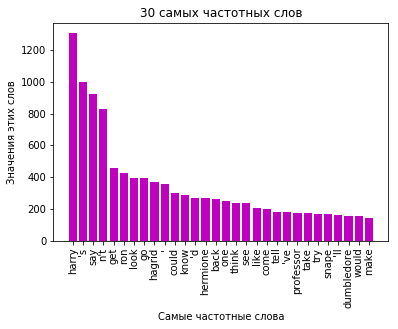

In [26]:
from nltk.corpus import stopwords
sw = stopwords.words('english') #делаем так, чтобы исчезли слова на английском языке
filtered = [w for w in novel.split() if w not in sw and w != ' '] #избавимся от стоп-слов
new_counts = Counter(filtered) #получаем отсортированный по частотности список
print(new_counts.most_common(30)) #выведем 30 самых частотных слов
X = [i for i in range (0, 30)] #берем 30 самых частотных слов
Y = [w[1] for w in new_counts.most_common(30)] #значение для каждого слова 
plt.xticks(X, [w[0] for w in new_counts.most_common(30)],rotation = 90) #повернем слова на 90 градусов, чтобы они не находили друг на друга
plt.bar(X,Y, color ='m')
plt.title("30 самых частотных слов")
plt.xlabel ('Самые частотные слова')
plt.ylabel ('Значения этих слов')
plt.show()